In [28]:
%matplotlib inline

from email_extractor import get_emails_df # local package
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SPAM_1_PATH = 'spam-data/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'spam-data/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'spam-data/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'spam-data/spam_assassin_corpus/easy_ham_2'

SPAM_CATEGORY = 1
HAM_CATEGORY = 0

DATA_JSON_FILE = '~/Área de Trabalho/emails_data.json' # MY desktop path

# *Gather data:*
### *load spam and ham body email DataFrames*

In [3]:
spam_emails = get_emails_df(SPAM_1_PATH, SPAM_CATEGORY)
spam_emails = spam_emails.append(get_emails_df(SPAM_2_PATH, SPAM_CATEGORY))

print(spam_emails.shape)
spam_emails.head()

(1898, 2)


,MESSAGE,CATEGORY
00279.1d58a13e343c1e53aca2ed2121a3f815,"5, Meridian East\n\nLeicester LE3 2WZ \n\nLeic...",1
00380.a262abe251ca7cc3026e4e146d9cf817,"<html>\n\n<TABLE id=AutoNumber2 style=""BORDER-...",1
00176.79f82496c612ea28f45f13ca5c47f8c2,<html>\n\n<head>\n\n<title></title>\n\n</head>...,1
00461.1a27d007492d1c665d07db820b7dc3b8,<html>\n\n<head>\n\n<title>Tell Me Where to Se...,1
00300.834f370a21ca4f1774d5724b5443411c,"<HTML>\n\n<BODY>\n\n<meta http-equiv=""Content-...",1


In [4]:
ham_emails = get_emails_df(EASY_NONSPAM_1_PATH, HAM_CATEGORY)
ham_emails = ham_emails.append(get_emails_df(EASY_NONSPAM_2_PATH, HAM_CATEGORY))

print(ham_emails.shape)
ham_emails.head()

(3901, 2)


,MESSAGE,CATEGORY
02152.8df514c41920019281f8f0723dad0001,URL: http://www.aaronsw.com/weblog/000622\n\nD...,0
01482.a3576ddec34b0481a9a671c1f3c141c3,"Tony L. Svanstrom wrote:\n\n\n\n>On Sun, 15 Se...",0
00152.703c271de3d42fb8bf266db6f77a0dda,"Thanks for the info AJ, I found ""weblog"" at \n...",0
00699.29e599983f044aee500f3a58c34acffc,"Gary Lawrence Murphy wrote:\n\n\n\n>>>>>>""R"" =...",0
01846.af884c94693e5cce571396b4fd151167,URL: http://boingboing.net/#85481660\n\nDate: ...,0


#### *full-data (spam/nonspam)*

In [5]:
data = pd.concat([spam_emails, ham_emails])
data.shape

(5799, 2)

# *Data cleaning*

In [6]:
# checking for null values
data.MESSAGE.isnull().values.any() # "Returns False unless there is at least one element within a series or along a Dataframe axis that is True or equivalent"
# data.MESSAGE.isnull().sum()

False

In [7]:
# checking for empty emails
print((data.MESSAGE.str.len() == 0).any())
# checking how many empty emails in the dataset
print((data.MESSAGE.str.len() == 0).sum())

True
3


In [8]:
# locate empty emails and remove empty emails
print(data[(data.MESSAGE.str.len() == 0)].index)
data.drop(['cmds'], inplace=True)

Index(['cmds', 'cmds', 'cmds'], dtype='object')


In [9]:
# re-check if drop was successful.
print((data.MESSAGE.str.len() == 0).any())

False


#### *Add IDs to emails for better dataset manipulation*

In [10]:
print(len(data.index))
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids # add new column

data

5796


,MESSAGE,CATEGORY,DOC_ID
00279.1d58a13e343c1e53aca2ed2121a3f815,"5, Meridian East\n\nLeicester LE3 2WZ \n\nLeic...",1,0
00380.a262abe251ca7cc3026e4e146d9cf817,"<html>\n\n<TABLE id=AutoNumber2 style=""BORDER-...",1,1
00176.79f82496c612ea28f45f13ca5c47f8c2,<html>\n\n<head>\n\n<title></title>\n\n</head>...,1,2
00461.1a27d007492d1c665d07db820b7dc3b8,<html>\n\n<head>\n\n<title>Tell Me Where to Se...,1,3
00300.834f370a21ca4f1774d5724b5443411c,"<HTML>\n\n<BODY>\n\n<meta http-equiv=""Content-...",1,4
...,...,...,...
01264.df4dfa46001904d832d56d2eabd4894d,"On Fri, Aug 16, 2002 at 07:58:07PM +0200, Tors...",0,5791
01298.c00e52eb757de239c8863a7a01ea0544,Update of /cvsroot/spamassassin/spamassassin\n...,0,5792
00908.fa150b0b994587469112fbcb7e8cc2bc,"On Fri, 2002-07-26 at 11:50, Ian Andrew Bell w...",0,5793
00077.7a4f2e80b3a2e2c1cc2442f54a9e01ee,"On Fri, Jul 19, 2002 at 10:00:02PM +0100, Matt...",0,5794


In [11]:
# rearrange columns
data['FILE_NAME'] = data.index # add new column with file_names
data.set_index('DOC_ID', inplace=True) # set the index as DOC_ID

In [12]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"5, Meridian East\n\nLeicester LE3 2WZ \n\nLeic...",1,00279.1d58a13e343c1e53aca2ed2121a3f815
1,"<html>\n\n<TABLE id=AutoNumber2 style=""BORDER-...",1,00380.a262abe251ca7cc3026e4e146d9cf817
2,<html>\n\n<head>\n\n<title></title>\n\n</head>...,1,00176.79f82496c612ea28f45f13ca5c47f8c2
3,<html>\n\n<head>\n\n<title>Tell Me Where to Se...,1,00461.1a27d007492d1c665d07db820b7dc3b8
4,"<HTML>\n\n<BODY>\n\n<meta http-equiv=""Content-...",1,00300.834f370a21ca4f1774d5724b5443411c
...,...,...,...
5791,"On Fri, Aug 16, 2002 at 07:58:07PM +0200, Tors...",0,01264.df4dfa46001904d832d56d2eabd4894d
5792,Update of /cvsroot/spamassassin/spamassassin\n...,0,01298.c00e52eb757de239c8863a7a01ea0544
5793,"On Fri, 2002-07-26 at 11:50, Ian Andrew Bell w...",0,00908.fa150b0b994587469112fbcb7e8cc2bc


#### *Export cleaned data as JSON file*

In [13]:
data.to_json(DATA_JSON_FILE) # exported to desktop for now

---

# *Data Visualization*

In [27]:
data.CATEGORY.value_counts()
amount_ham, amount_spam = data.CATEGORY.value_counts()
print(amount_ham, amount_spam)

3900 1896


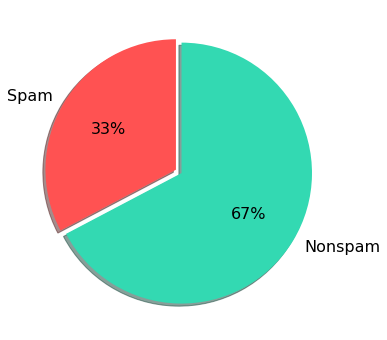

In [99]:
# Generate pie chart
category_names = ['Spam', 'Nonspam']
sizes = [amount_spam, amount_ham]
pie_colors = ['#ff5252', '#33d9b2']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=category_names, 
        textprops={'fontsize': 16}, startangle=90, 
        autopct='%1.0f%%', colors=pie_colors,
        explode=[0, 0.05], shadow=True         
       )
plt.show()

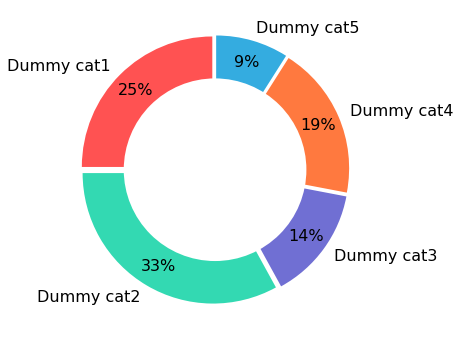

In [110]:
# Generate donut chart 
# more useful when dealing with a higher number of categories
# Leaving it here for reference only
category_names = ['Dummy cat1', 'Dummy cat2', 'Dummy cat3', 'Dummy cat4', 'Dummy cat5']
sizes = [25, 33, 14, 19, 9] # dummy values
pie_colors = ['#ff5252', '#33d9b2', '#706fd3', '#ff793f', '#34ace0']
offset = [0.03, 0.03, 0.03, 0.03, 0.03]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=category_names, 
        textprops={'fontsize': 16}, startangle=90, 
        autopct='%1.0f%%', colors=pie_colors,
        explode=offset, pctdistance=0.83)
# draw a circle inside
center_circle = plt.Circle((0,0), radius=0.7, fc='white') # fc must match the background color
plt.gca().add_artist(center_circle)
plt.show()

---